In [1]:
import numpy as np
import pandas 
from matplotlib import pyplot as plt, cm as cmap

In [23]:
### Constants
AIR_DENSITY     = 1.225         * 1e0   # kg/m**3
AIR_VISCOSITY   = 1.7894e-5     * 1e0   # kg/m/s  or Pa*s (Dynamic)


AIR_DENSITY = 1.1368

In [3]:
### Config
MEAN_CHORD      = 200           * 1e-3  # mm
WINGSPAN        = 1200          * 1e-3  # mm
ASPECT_RATIO    = WINGSPAN/MEAN_CHORD


In [4]:
alpha,reynolds,cl,cd,cm = np.load("tkv2008_analysis_3.npy",allow_pickle=True)

array([[0.24921, 0.27034, 0.26966, ..., 0.26932,     nan,     nan],
       [0.24769, 0.26871, 0.26807, ..., 0.26761,     nan,     nan],
       [0.24636, 0.26713, 0.2665 , ..., 0.26586,     nan,     nan],
       ...,
       [0.3233 , 0.32219, 0.31752, ..., 0.20787, 0.20205, 0.19939],
       [0.32588, 0.32186, 0.32127, ..., 0.21025, 0.2046 , 0.20199],
       [0.32696, 0.32523, 0.32139, ..., 0.2127 , 0.20704, 0.20445]])

In [5]:
velocity = AIR_VISCOSITY * reynolds / AIR_DENSITY / MEAN_CHORD

In [6]:
idrag = 0.035
efficiency = 1/(1+idrag)

In [7]:
efficiency

0.9661835748792271

In [8]:
CL = np.zeros(cl.shape)
for index,rey in enumerate(reynolds):
    cl_r = cl[:,index]
    alpha_zero = np.nanargmin(np.abs(cl_r))
    cl_prime = cl_r[1:]-cl_r[:-1]

    a0 = np.insert(cl_prime,alpha_zero,0)
    # a = a0/np.sqrt(1+(a0/np.pi/ASPECT_RATIO)**2+(a0/np.pi/ASPECT_RATIO))
    a = a0/(1+(a0*180/np.pi/(np.pi*ASPECT_RATIO*efficiency)))
    for alph_forward in range(alpha_zero+1,cl.shape[0]):
        CL[alph_forward,index] = CL[alph_forward-1,index] + a[alph_forward]
    for alph_backward in range(alpha_zero-1,-1,-1):
        CL[alph_backward,index] = CL[alph_backward+1,index] - a[alph_backward]

In [9]:
CD = cd + CL**2/np.pi/efficiency/ASPECT_RATIO

In [10]:
CM = cm

In [11]:
l = AIR_DENSITY * velocity**2 * MEAN_CHORD      * WINGSPAN * CL / 2
d = AIR_DENSITY * velocity**2 * MEAN_CHORD      * WINGSPAN * CD / 2
m = AIR_DENSITY * velocity**2 * MEAN_CHORD**2   * WINGSPAN * CM / 2

In [24]:
velocity[np.nanargmin(np.abs(velocity-15))]

14.607346938775507

In [30]:
l[np.nanargmin(np.abs(alpha-10)),np.nanargmin(np.abs(velocity-10.5))]/9.8

3.1973378703483997

In [159]:
colormap = {
    "None":{
        "fig_facecolor":"white",
        "axes_lines":"black",
        "ax_facecolor":"white",
        "tick_color":"black",
        "label_color":"black"
        
    },
    "Dark":{
        "fig_facecolor":(0.117,0.117,0.117),
        "axes_lines":"grey",
        "ax_facecolor":(0.05,0.05,0.05),
        "tick_color":"grey",
        "label_color":(0.4,0.4,0.4)
        
    }
}

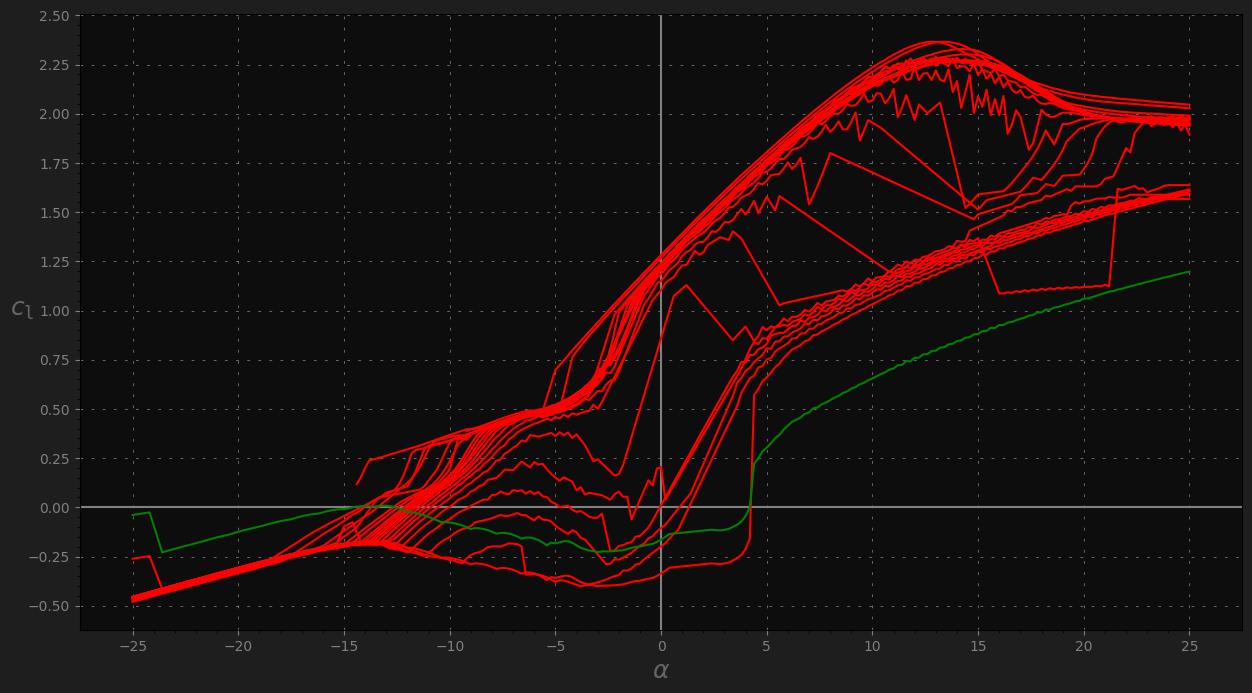

In [162]:
## plot
current_cm = colormap['Dark']
fig = plt.figure(figsize=(15,8))
fig.set_facecolor(current_cm['fig_facecolor'])
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("$c_{\\mathtt{l}}$",rotation=0,color=current_cm['label_color'],fontsize=18)
ax.set_xlabel("$\\alpha$",color=current_cm['label_color'],fontsize=18)
ax.axvline(color=current_cm['axes_lines'])
ax.axhline(color=current_cm['axes_lines'])
ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
ax.set_yticks(np.arange(-0.5,3,0.05),minor=True)
ax.set_yticks(np.arange(-0.5,3,0.25))
ax.set_xticks(alpha[0::5],minor=True)
ax.tick_params(axis='x', colors=current_cm['tick_color'])
ax.tick_params(axis='y', colors=current_cm['tick_color'])
ax.set_xticks(alpha[0::25])
ax.set_facecolor(current_cm['ax_facecolor'])
ax.plot(alpha,cl,color='red')
ax.plot(alpha,CL[:,0],color='green')

In [ ]:
## plot
current_cm = colormap['Dark']
fig = plt.figure(figsize=(15,8))
fig.set_facecolor(current_cm['fig_facecolor'])
ax = fig.add_subplot(1,1,1)
for index,rey in enumerate(reynolds):
    ax.set_ylabel("$c_{\\mathtt{l}}$",rotation=0,color=current_cm['label_color'],fontsize=18)
    ax.set_xlabel("$\\alpha$",color=current_cm['label_color'],fontsize=18)
    ax.axvline(color=current_cm['axes_lines'])
    ax.axhline(color=current_cm['axes_lines'])
    ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
    ax.set_yticks(np.arange(-0.5,3,0.05),minor=True)
    ax.set_yticks(np.arange(-0.5,3,0.25))
    ax.set_xticks(alpha[0::5],minor=True)
    ax.tick_params(axis='x', colors=current_cm['tick_color'])
    ax.tick_params(axis='y', colors=current_cm['tick_color'])
    ax.set_xticks(alpha[0::25])
    ax.set_facecolor(current_cm['ax_facecolor'])
    ax.plot(alpha,CL[:,index],color='#00ffff')
    ax.plot(alpha,cl[:,index],color='#00ff00')
    ax.plot(alpha,CD[:,index],color='#ff00ff')
    ax.plot(alpha,cd[:,index],color='#ff0000')
    ax.plot(alpha,CL[:,index]/CD[:,index]/8,color='#002fff')
    L0 = np.nanargmin(np.abs(cl[:,index]))
    E_max = np.nanargmax(CL[:,index]/CD[:,index])
    ax.set_title(f'Reynolds= {int(rey/1000)}e+3        Speed= {round(rey*AIR_VISCOSITY/AIR_DENSITY/MEAN_CHORD,2)} m/s        $\\alpha_{{L=0}}= {alpha[L0]}$°        $\\alpha_{{E_{{max}}}}= {alpha[E_max]}$°',color='white')

    ax.vlines(alpha[E_max], ymin=-0.25, ymax=1.25,color='#444444')
    fig.savefig(f'CL_CD/{str(int(rey/1000)).zfill(4)}.png')
    ax.clear()

[0.24413    0.26408    0.26341    0.26283           nan 0.26235833
 0.26227    0.26221    0.26213    0.26208           nan 0.26199
 0.26204    0.26189    0.26185333 0.2618     0.26164    0.2621
 0.26203    0.26236           nan        nan] [-0.2479     -0.4311     -0.43093333 -0.431              nan -0.43216667
 -0.4328     -0.4335     -0.4345     -0.4354             nan -0.4372
 -0.4382     -0.4389     -0.44113333 -0.4433     -0.4462     -0.4489
 -0.4534     -0.4564             nan         nan] -24.2


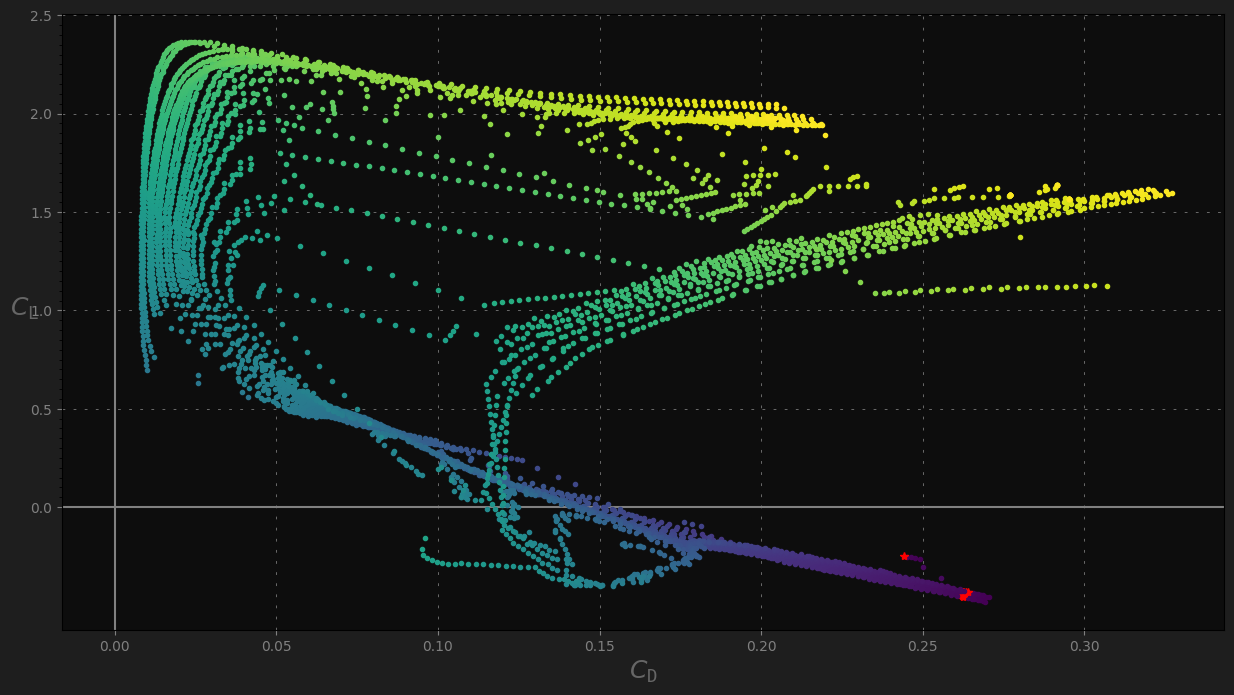

In [170]:
## plot
current_cm = colormap['Dark']
fig = plt.figure(figsize=(15,8))
fig.set_facecolor(current_cm['fig_facecolor'])
ax = fig.add_subplot(1,1,1)
ax.set_ylabel("$C_{\\mathtt{L}}$",rotation=0,color=current_cm['label_color'],fontsize=18)
ax.set_xlabel("$C_{\\mathtt{D}}$",color=current_cm['label_color'],fontsize=18)
ax.axvline(color=current_cm['axes_lines'])
ax.axhline(color=current_cm['axes_lines'])
ax.grid(which='major',linewidth=0.4,linestyle=(0, (5,15)))
ax.set_yticks(np.arange(0,3,0.05),minor=True)
ax.set_yticks(np.arange(0,3,0.5))
ax.set_xticks(np.arange(0,3,0.05),minor=True)
ax.set_xticks(np.arange(0,3,0.05))
ax.tick_params(axis='x', colors=current_cm['tick_color'])
ax.tick_params(axis='y', colors=current_cm['tick_color'])
ax.set_facecolor(current_cm['ax_facecolor'])
max_ef = np.argmax(cl/cd)
for i,_ in enumerate(cd):
    if i == max_ef: 
        ax.plot(cd[i],cl[i],'*',color='red')
        print(cd[max_ef],cl[max_ef],alpha[max_ef])
    else: ax.plot(cd[i],cl[i],'.',color=cmap.viridis(i/len(cd)))

In [49]:
import importlib

In [52]:
import lift_coef
importlib.reload(lift_coef)

<module 'lift_coef' from 'c:\\Users\\HDIAS\\py\\14bits_calc\\Aerodynamics\\lift_coef.py'>

In [58]:
ar,L = lift_coef.lift(1.4,0.38,0.015)

In [60]:
L[np.nanargmin(np.abs(alpha-1)),np.nanargmin(np.abs(velocity-10.5))]/9.8

1.75176917564118

In [43]:
2/1.25

1.6

In [55]:
ar

5.157894736842104

In [57]:
0.15/0.3

0.5